In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

----------------------------------------------------------------------
<bound method DataFrame.info of              theta_1   theta_2   theta_3   theta_4   theta_5    theta_6
2017-01-01  0.756936 -1.467790  0.096136 -0.115306 -0.447908   0.902579
2017-01-02  0.767089  0.185797 -1.428536 -0.086443 -0.954288   1.930909
2017-01-03  0.404544  1.415887  0.443466  0.000200 -0.892351   2.449691
2017-01-04  1.313957 -1.804471 -0.836986  0.011785 -1.012518   1.182085
2017-01-05  0.209862  1.315868  0.140993 -0.046473 -1.417092   1.742433
...              ...       ...       ...       ...       ...        ...
2019-12-27 -1.520171 -1.128868  1.108275  0.936817  0.948045  11.755980
2019-12-28  0.338910 -3.178251  1.484579  1.051123  1.025288  11.397092
2019-12-29  0.263781  0.045725 -0.112476  0.823782  0.914111  10.918941
2019-12-30 -0.425098 -1.002701 -0.834294  0.850904  0.801977  11.140722
2019-12-31  0.848302  3.510521 -0.280626  0.967050  1.091803  11.989975

[1095 rows x 6 columns]>


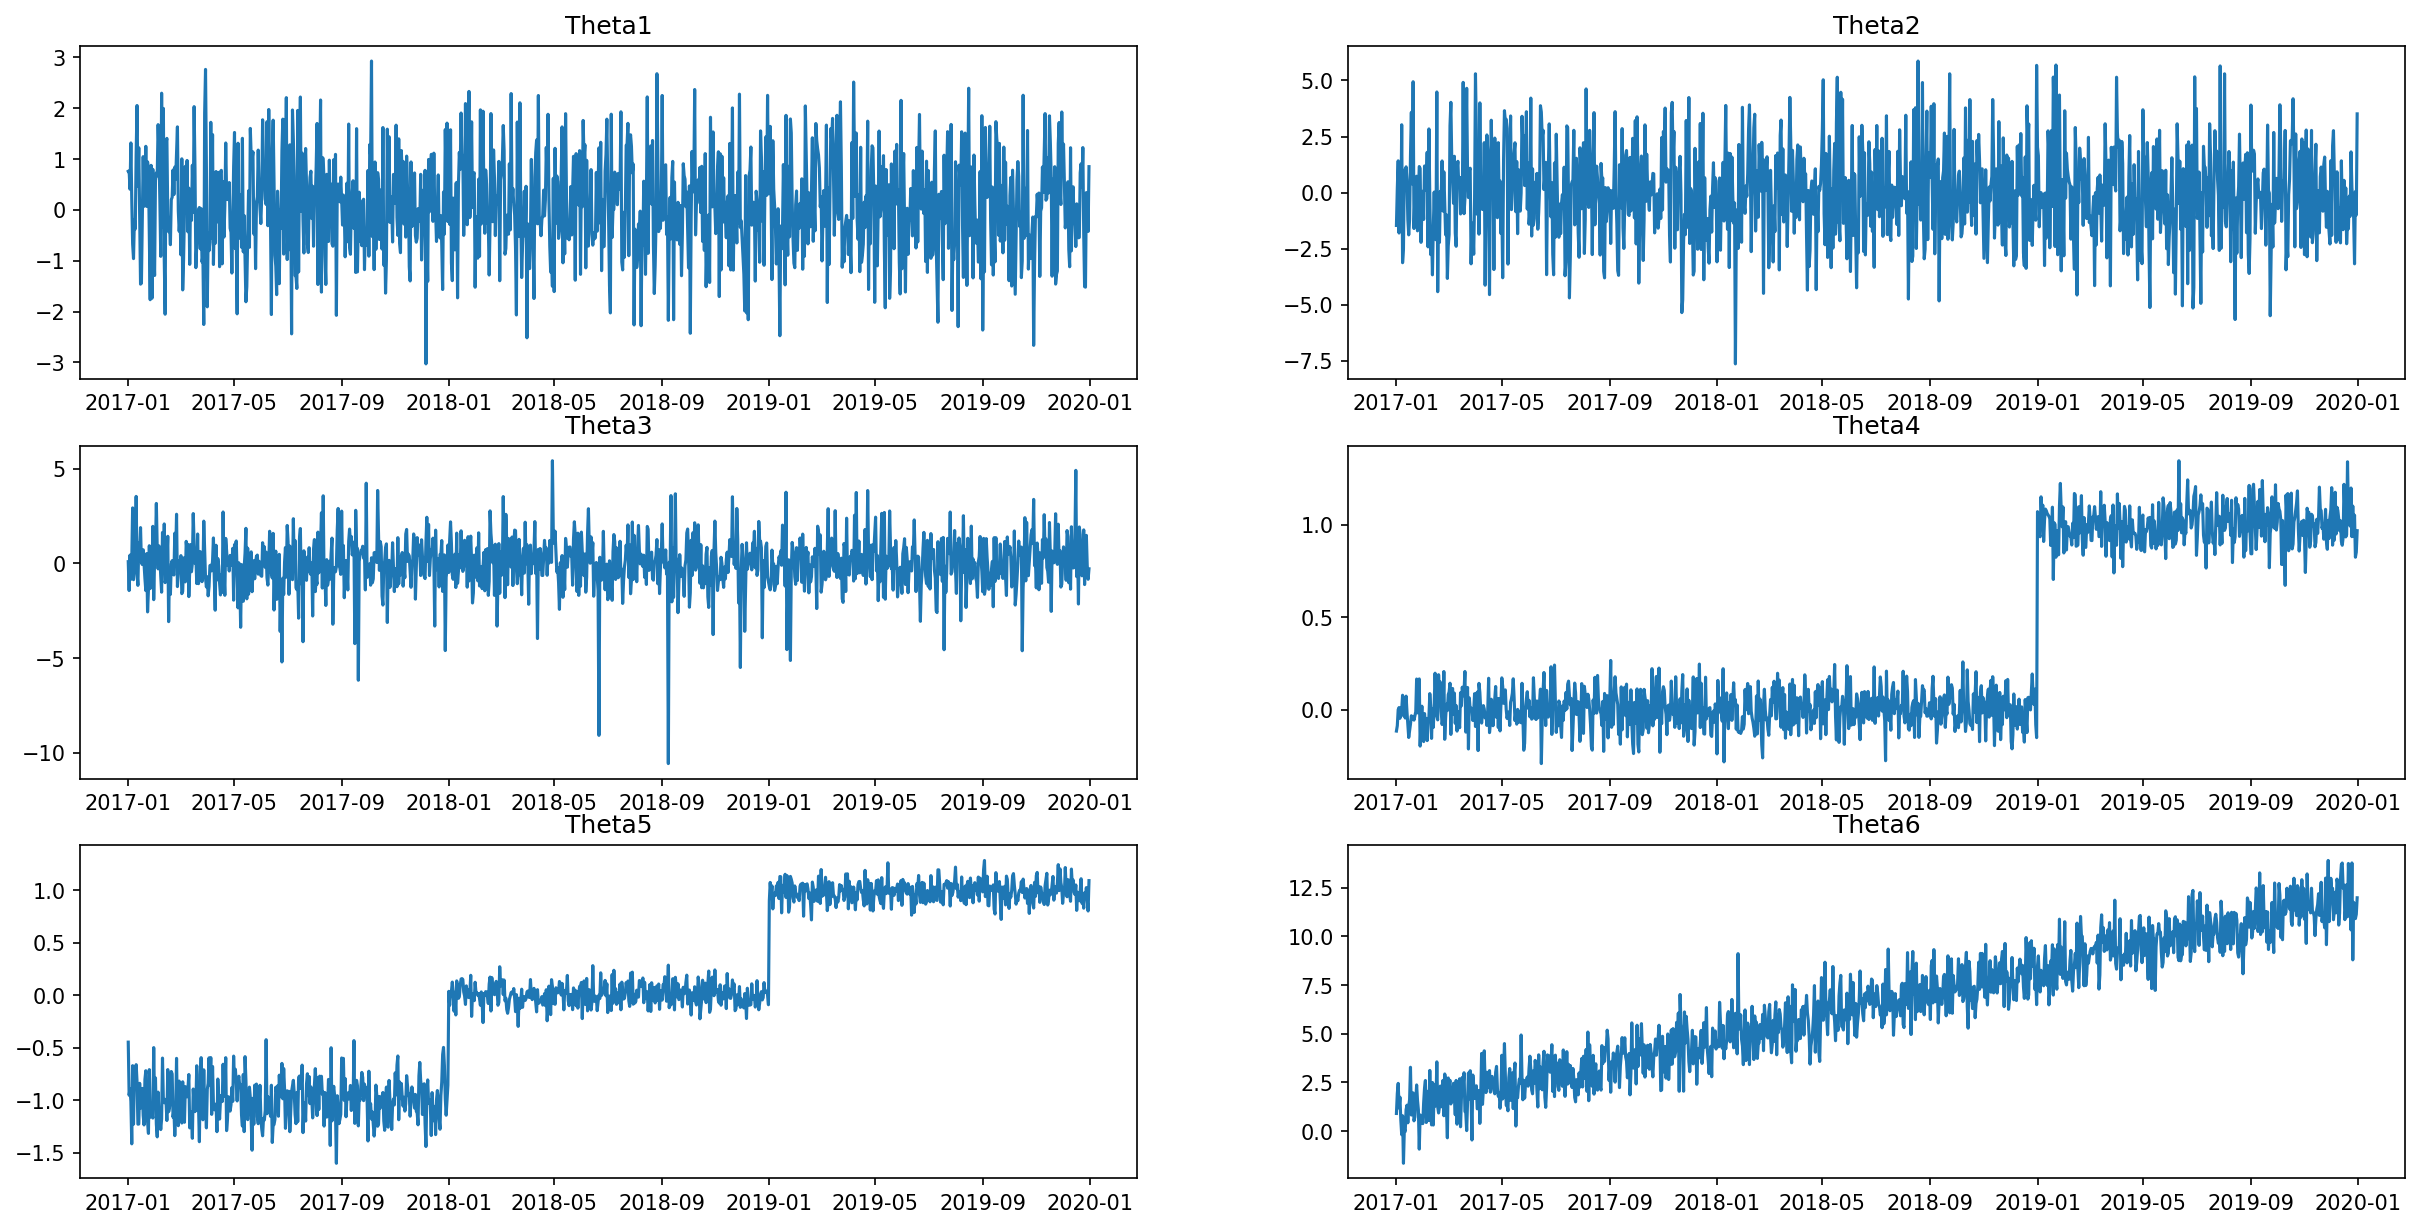

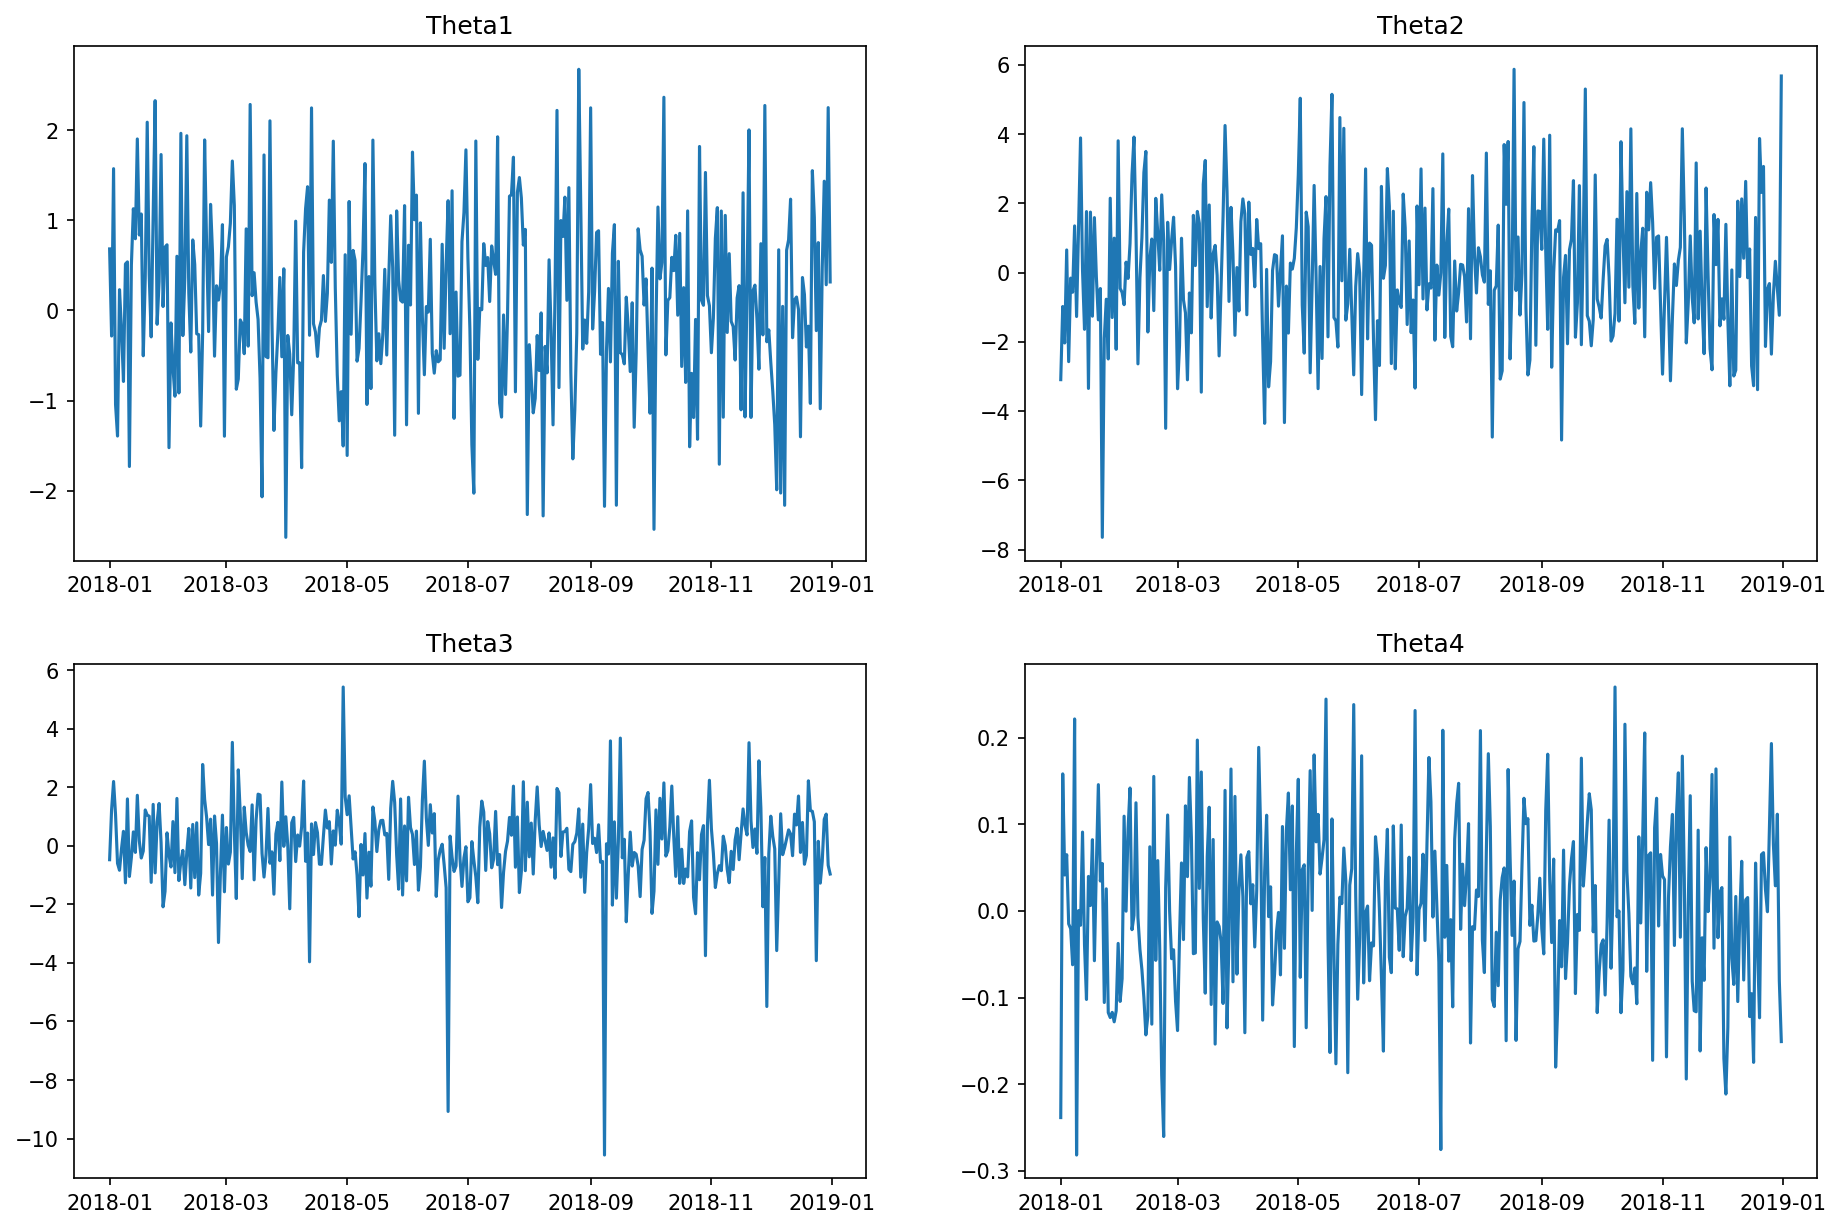

In [3]:
# Funkcja do plotowania pandas.DataFrame
def PlotPandasDataFrameCols(df, rows=-1, cols=-1, figsize=(10,10),
                            masterName = 'Plot '):
    # Wybieranie wymiarów
    if rows == -1 or cols == -1:
        cols = 2
        rows = int(df.shape[1]/2)
    
    #Plotowanie
    fig, axes = plt.subplots(rows, cols, dpi=150, figsize=figsize)
    for index, series in enumerate(df):
        row = int(index / cols)
        col = index % cols
        axes[row, col].plot(df[series])
        axes[row, col].set_title(masterName + str(index + 1))
    plt.show()

# Zadanie 1
print('----------------------------------------------------------------------')
# Wczytywanie danych
dp = pd.read_csv('Data1.csv', index_col=0, header=0, parse_dates=True)
print(dp.info)

# Pierwszy wykres
PlotPandasDataFrameCols(dp, figsize=(20,10), masterName='Theta')

# Drugi wykres i filtrowanie danych
tmpDp = dp
tmpDp = tmpDp.filter(like='2018', axis=0)
tmpDp = tmpDp[['theta_1', 'theta_2', 'theta_3', 'theta_4']]
PlotPandasDataFrameCols(tmpDp, figsize=(15,10), masterName='Theta')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


----------------------------------------------------------------------


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



       Mean    MCSE  StdDev    5%   50%   95%   N_Eff  N_Eff/s  R_hat
name                                                                 
lp__  -8.20  0.0170    0.72 -9.70 -7.90 -7.60  1800.0  28000.0    1.0
theta  0.66  0.0033    0.13  0.43  0.67  0.86  1600.0  24000.0    1.0


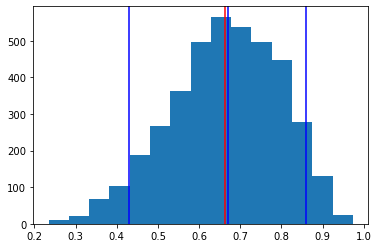

In [4]:
# Zadanie 2
print('----------------------------------------------------------------------')

# Generowanie listy inicjalizacyjnej
F = 3
L = 7
stanDataset = {'N': F + L, 'y': [0]*F + [1]*L}
# Ładowanie modelu stan
model = CmdStanModel(stan_file='bern_1.stan')
sample = model.sample(stanDataset)
theta = sample.stan_variable('theta')

# Wywietlanie informacji o modelu
summary = sample.summary()
print(summary)

# Tworzenie histogramu
plt.hist(theta, bins=15)
# Znajdywanie lini do zaznaczenia
plt.axvline(theta.mean(), color='r')
plt.axvline(summary['5%']['theta'], color='b')
plt.axvline(summary['50%']['theta'], color='b')
plt.axvline(summary['95%']['theta'], color='b')
plt.show()